In [1]:
%matplotlib inline
import warnings

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

from functions.functions import get_region_coords, colored_line, create_map, region_contours
from functions.latex import set_size

from matplotlib.collections import LineCollection
from global_land_mask import globe


datadir = "../data/"
figdir = "../figures/"

In [2]:
mdt_list = ["dtu", "cnes"]
hydrography_list = ["woa", "mimoc"]
vector = ["us", "vs"]

ds_dict = {}
for mdt in mdt_list:
    for hydrography in hydrography_list:
        ds = xr.open_dataset(datadir + f"velocities_{mdt}_{hydrography}_ease.nc")
        ds_dict[f"{mdt}_{hydrography}"] =  ds

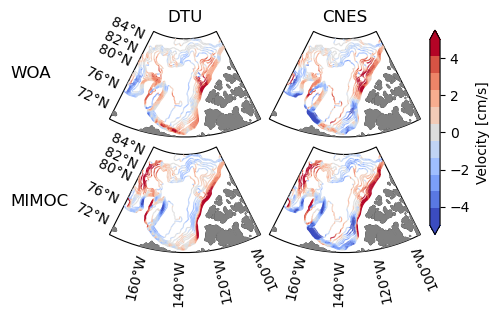

In [3]:
region_name_plot = "canada_basin"
region = get_region_coords(region_name_plot)

cmap = plt.get_cmap('coolwarm', 11)
fig, axes = create_map(region,
                     figsize=set_size("AGU", subplots=(2, 2)),
                     subplots=(2, 2)
                    )

norm = mcolors.Normalize(vmin=-5, vmax=5)


ds_list = ["dtu_woa", "cnes_woa", "dtu_mimoc", "cnes_mimoc"]
vectors = [["ub", "vb"], ["ub", "vb"], ["ub", "vb"], ["ub", "vb"]]


for ax, ds_name, vector in zip(axes.flatten(), ds_list, vectors):
    ds = ds_dict[ds_name]
    ds_copy = ds.copy(deep=True)
    # Create a condition mask
    mask_copy = ds_copy.lon < 0
    ds_copy = ds.assign_coords(
                lon=xr.where(mask_copy, ds.lon+360, ds.lon)
            )
    for region_name in region_contours:
        region = get_region_coords(region_name, xy=True)
        contour_depths = region_contours[region_name]
        ds = ds_dict[ds_name]
        ds_sel = ds.sel(x=slice(region[0], region[1]),
                        y=slice(region[2], region[3]))
        for contour_depth in contour_depths:
            contour = xr.open_dataset(datadir + region_name + "/contour_eff_" + str(contour_depth) + ".nc")
            ds_interp = ds.interp(x=contour.x, y=contour.y, method="linear")
            ds_copy_interp = ds_copy.interp(x=contour.x, y=contour.y, method="linear")

            ds_interp = ds_interp.assign_coords(
                                                lon=xr.where(np.abs(ds_interp.lon) < 1, ds_interp.lon, ds_copy_interp.lon)
                                                )
            ds_interp["uc"] = ds_interp[vector[0]]*contour.tx + ds_interp[vector[1]]*contour.ty + (-ds_interp[vector[0]]*contour.ty + ds_interp[vector[1]]*contour.tx)*1j
            
            c = colored_line(ds_interp.lon.values, ds_interp.lat.values, ds_interp.uc.real.values*100, ax=ax,
                                cmap=cmap,
                                linewidth=0.8,
                                norm=norm,
                                zorder=10
                                )
            c.set_rasterized(True)


gl0 = axes[0, 0].gridlines(draw_labels=True, zorder=1, y_inline=False, x_inline=False)
gl0.xlines = False
gl0.ylines = False
gl0.right_labels = False
gl0.top_labels = False
gl0.bottom_labels = False

gl0 = axes[1, 0].gridlines(draw_labels=True, zorder=1, y_inline=False, x_inline=False)
gl0.xlines = False
gl0.ylines = False
gl0.right_labels = False
gl0.top_labels = False

gl0 = axes[1, 1].gridlines(draw_labels=True, zorder=1, y_inline=False, x_inline=False)
gl0.xlines = False
gl0.ylines = False
gl0.right_labels = False
gl0.left_labels = False
gl0.top_labels = False


axes[0, 0].set_title("DTU", fontsize=12)
axes[0, 1].set_title("CNES", fontsize=12)
fig.text(0.05, 0.725, "WOA", fontsize=12)
fig.text(0.05, 0.350, "MIMOC", fontsize=12)
fig.tight_layout()
fig.subplots_adjust(wspace=-0.3, hspace=0.3)
fig.colorbar(c,
             ax=axes,
             label="Velocity [cm/s]",
             shrink=1,
             pad=0.02,
             extend="both"
            )

fig.savefig(figdir + f"{region_name_plot}_flow_comparative.pdf", dpi=300, bbox_inches="tight")

/home/jaka9249/miniconda3/envs/phd/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


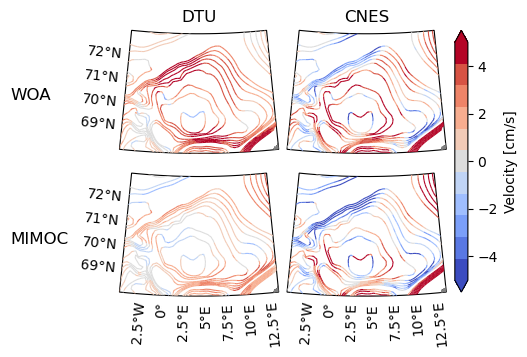

In [4]:
region_name_plot = "lofoten_basin"
region = get_region_coords(region_name_plot)

cmap = plt.get_cmap('coolwarm', 11)
fig, axes = create_map(region,
                     figsize=set_size("AGU", subplots=(2, 2)),
                     subplots=(2, 2),
                     sharex=True,
                     sharey=True
                    )

norm = mcolors.Normalize(vmin=-5, vmax=5)


ds_list = ["dtu_woa", "cnes_woa", "dtu_mimoc", "cnes_mimoc"]
vectors = [["ub", "vb"], ["ub", "vb"], ["ub", "vb"], ["ub", "vb"]]


for ax, ds_name, vector in zip(axes.flatten(), ds_list, vectors):
    ds = ds_dict[ds_name]
    ds_copy = ds.copy(deep=True)
    # Create a condition mask
    mask_copy = ds_copy.lon < 0
    ds_copy = ds.assign_coords(
                lon=xr.where(mask_copy, ds.lon+360, ds.lon)
            )
    for region_name in region_contours:
        region = get_region_coords(region_name, xy=True)
        contour_depths = region_contours[region_name]
        ds = ds_dict[ds_name]
        ds_sel = ds.sel(x=slice(region[0], region[1]),
                        y=slice(region[2], region[3]))
        for contour_depth in contour_depths:
            contour = xr.open_dataset(datadir + region_name + "/contour_eff_" + str(contour_depth) + ".nc")
            ds_interp = ds.interp(x=contour.x, y=contour.y, method="linear")
            ds_copy_interp = ds_copy.interp(x=contour.x, y=contour.y, method="linear")

            ds_interp = ds_interp.assign_coords(
                                                lon=xr.where(np.abs(ds_interp.lon) < 1, ds_interp.lon, ds_copy_interp.lon)
                                                )
            ds_interp["uc"] = ds_interp[vector[0]]*contour.tx + ds_interp[vector[1]]*contour.ty + (-ds_interp[vector[0]]*contour.ty + ds_interp[vector[1]]*contour.tx)*1j
            
            c = colored_line(ds_interp.lon.values, ds_interp.lat.values, ds_interp.uc.real.values*100, ax=ax,
                                cmap=cmap,
                                linewidth=0.8,
                                norm=norm,
                                zorder=10
                                )
            c.set_rasterized(True)
gl0 = axes[0, 0].gridlines(draw_labels=True, zorder=1, y_inline=False, x_inline=False)
gl0.xlines = False
gl0.ylines = False
gl0.right_labels = False
gl0.top_labels = False
gl0.bottom_labels = False

gl0 = axes[1, 0].gridlines(draw_labels=True, zorder=1, y_inline=False, x_inline=False)
gl0.xlines = False
gl0.ylines = False
gl0.right_labels = False
gl0.top_labels = False

gl0 = axes[1, 1].gridlines(draw_labels=True, zorder=1, y_inline=False, x_inline=False)
gl0.xlines = False
gl0.ylines = False
gl0.right_labels = False
gl0.left_labels = False
gl0.top_labels = False


axes[0, 0].set_title("DTU", fontsize=12)
axes[0, 1].set_title("CNES", fontsize=12)
fig.text(-0.025, 0.675, "WOA", fontsize=12)
fig.text(-0.025, 0.250, "MIMOC", fontsize=12)

fig.subplots_adjust(wspace=-0.1, hspace=0.2)
fig.colorbar(c,
             ax=axes,
             label="Velocity [cm/s]",
             shrink=1,
             pad=0.02,
             extend="both"
            )
fig.savefig(figdir + f"{region_name_plot}_flow_comparative.pdf", dpi=300, bbox_inches="tight")